In [3]:
import numpy as np
np.random.seed(42)

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
28*28

784

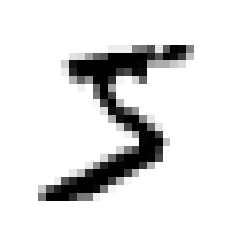

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
y[0]

5

In [13]:
y = y.astype(np.uint8)

In [14]:
y[0]

5

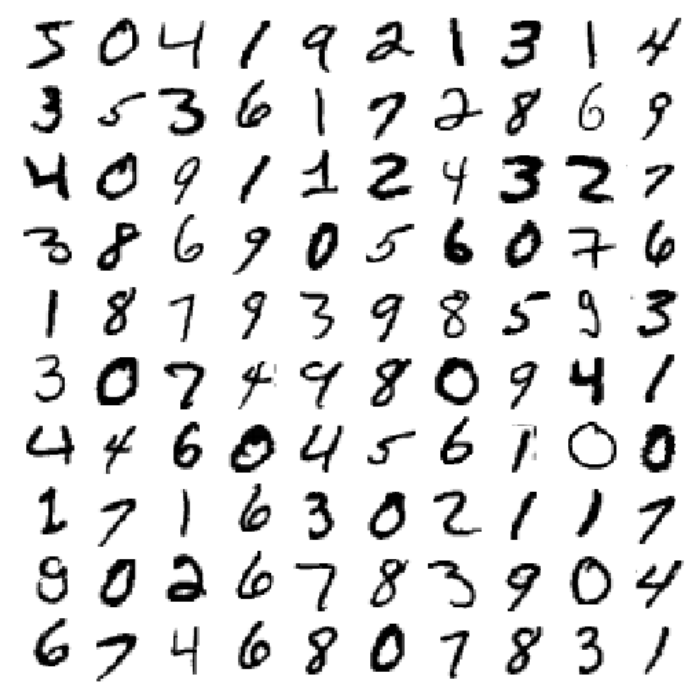

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### MNIST 데이터셋으로 분류기 만들기 (테스트 세트에서 97% 정확도 목표)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}
]

kn = KNeighborsClassifier()

grid_search = GridSearchCV(kn, param_grid, cv=5, verbose=2, n_jobs = -1)

grid_search.fit(X_train, y_train)


In [ ]:
# 강사님 코드
# 참고로 이거 오래 걸린다.

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}
# ]

# knn_clf = KNeighborsClassifier()
# grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)


* 최적의 파리미터

In [12]:
####

{'n_neighbors': 4, 'weights': 'distance'}

* best score

In [13]:
####

0.9716166666666666

* 정확도

In [14]:
####

0.9714

In [ ]:
import joblib
joblib.dump(grid_search, "mnist_knn_model.pkl")

loaded_grid_search